### 선형 회귀

In [28]:
import matplotlib.pyplot as plt
import numpy as np


### y = 3x -2 데이터 생성

np.random.seed(0)
x = np.random.rand(100, 1)  # 0~1까지 난수를 100행 1열을 생성
x = x * 4 - 2                     # 값의 범위를 -2~2로 변경
print(x[0:5])

[[ 0.19525402]
 [ 0.86075747]
 [ 0.4110535 ]
 [ 0.17953273]
 [-0.3053808 ]]


In [29]:
y = 3 * x - 2  # y = 3x - 2
print(y[0:5])

[[-1.41423795]
 [ 0.5822724 ]
 [-0.76683949]
 [-1.4614018 ]
 [-2.91614241]]


기울기(계수): [[3.]]
y 절편: [-2.]


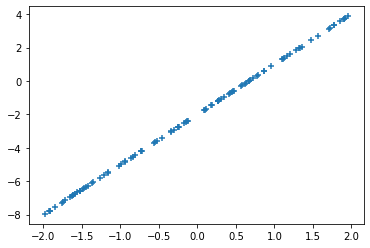

In [30]:
from sklearn import linear_model

model = linear_model.LinearRegression() # 모델 생성
model.fit(x, y) # 학습 x:데이터, y:실제값, 기울기 coef_, 절편 intercept_

print('기울기(계수):', model.coef_)
print('y 절편:', model.intercept_)

plt.scatter(x, y, marker='+')
plt.show()

In [31]:
# 데이터에 오차 추가

### 분산 y = 3x -2 데이터를 생성

np.random.seed(0)
x = np.random.rand(100, 1)  # 0~1까지 난수를 100개 만든다
x = x * 4 - 2               # 값의 범위를 -2~2로 변경

y = 3 * x - 2  # y = 3x - 2
print(y[0:5])
y = y + np.random.randn(100, 1)  # 표준 정규 분포(평균 0, 표준 편차 1)의 난수를 추가함
print(y[0:5])

[[-1.41423795]
 [ 0.5822724 ]
 [-0.76683949]
 [-1.4614018 ]
 [-2.91614241]]
[[-2.57938779]
 [ 1.48309888]
 [-0.30117705]
 [-2.99764549]
 [-1.42789021]]


기울기(계수): [[2.98423376]]
y 절편: [-1.80938141]
결정 계수: 0.9226827678406243


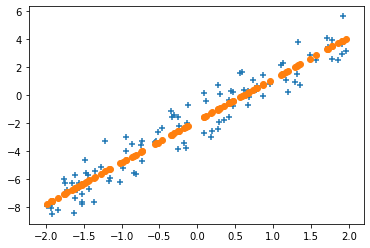

In [32]:
model = linear_model.LinearRegression() # 모델 생성
model.fit(x, y)

print('기울기(계수):', model.coef_) # 기울기
print('y 절편:', model.intercept_) # 절편

r2 = model.score(x, y) # 결정계수
print('결정 계수:', r2)

plt.scatter(x, y, marker='+') # 실제값
plt.scatter(x, model.predict(x), marker = 'o') # 예측모델
plt.show()

### 2차함수 형태를 갖는 선형회귀

In [6]:
np.random.seed(0)
x = np.random.rand(100, 1)  # 0~1까지 난수를 100개 만든다
x = x * 4 - 2                     # 값의 범위를 -2~2로 변경

y = 3 * x**2 - 2  # y = 3x² - 2
print(y[0:5])
y = y + np.random.randn(100, 1)  # 표준 정규 분포(평균 0, 표준 편차 1)의 난수를 추가함
print(y[0:5])

[[-1.88562761]
 [ 0.22271024]
 [-1.49310505]
 [-1.90330399]
 [-1.7202277 ]]
[[-3.05077745]
 [ 1.12353673]
 [-1.02744261]
 [-3.43954768]
 [-0.2319755 ]]


기울기(계수): [[2.89086437]]
y 절편: [-1.66123534]
결정 계수: 0.9280563575307348


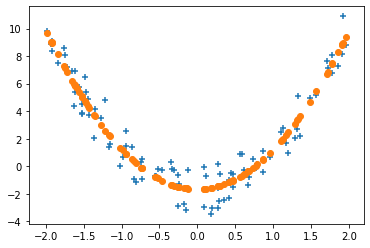

In [7]:
model = linear_model.LinearRegression() # 모델 생성
model.fit(x**2, y)

print('기울기(계수):', model.coef_)
print('y 절편:', model.intercept_)

r2 = model.score(x**2, y)
print('결정 계수:', r2)

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x**2), marker = 'o')
plt.show()

### 다중 선형 회귀

In [8]:
np.random.seed(0)
x1 = np.random.rand(100, 1)  # 0~1까지 난수를 100개 만든다
x1 = x1 * 4 - 2              # 값의 범위를 -2~2로 변경
print(x1[0])
x2 = np.random.rand(100, 1)  # x2에 대해서도 같게
x2 = x2 * 4 - 2
print(x2[0])
y = 3 * x1 - 2 * x2 + 1

[0.19525402]
[0.71126615]


In [9]:
x1_x2 = np.c_[x1, x2]  # [[x1_1, x2_1], [x1_2, x2_2], ..., [x1_100, x2_100]] 형태로 변환
print(x1_x2[0:5])
print(x1_x2.shape)

[[ 0.19525402  0.71126615]
 [ 0.86075747 -0.91996811]
 [ 0.4110535   0.94077609]
 [ 0.17953273  1.84875418]
 [-0.3053808  -1.00498743]]
(100, 2)


계수 [[ 3. -2.]]
절편 [1.]
결정계수 1.0


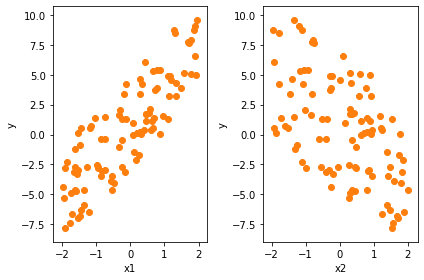

In [10]:
model = linear_model.LinearRegression()
model.fit(x1_x2, y)

### 계수, 절편, 결정 계수를 표시

print('계수', model.coef_)
print('절편', model.intercept_)
print('결정계수', model.score(x1_x2, y))


### 그래프 표시
y_ = model.predict(x1_x2)  # 구한 회귀식으로 예측

plt.subplot(1, 2, 1)
plt.scatter(x1, y, marker='+') # 예측 데이터에 가려져서 안보임.
plt.scatter(x1, y_, marker='o')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(x2, y, marker='+')
plt.scatter(x2, y_, marker='o')
plt.xlabel('x2')
plt.ylabel('y')

plt.tight_layout()
plt.show()

### 다중 선형 회귀 오차 추가

In [11]:
np.random.seed(0)
x1 = np.random.rand(100, 1)  # 0~1까지 난수를 100개 만든다
x1 = x1 * 4 - 2              # 값의 범위를 -2~2로 변경
print(x1[0])
x2 = np.random.rand(100, 1)  # x2에 대해서도 같게
x2 = x2 * 4 - 2
print(x2[0])
y = 3 * x1 - 2 * x2 + 1
print(y[0])
y = y + np.random.randn(100, 1) # 표준 정규 분포 형태 난수
print(y[0])

[0.19525402]
[0.71126615]
[0.16322975]
[1.28986567]


In [12]:
x1_x2 = np.c_[x1, x2]  # [[x1_1, x2_1], [x1_2, x2_2], ..., [x1_100, x2_100]] 형태로 변환
print(x1_x2[0:5])
print(x1_x2.shape)

[[ 0.19525402  0.71126615]
 [ 0.86075747 -0.91996811]
 [ 0.4110535   0.94077609]
 [ 0.17953273  1.84875418]
 [-0.3053808  -1.00498743]]
(100, 2)


계수 [[ 2.86208861 -2.06471169]]
절편 [0.90205915]
결정계수 0.953658227927694


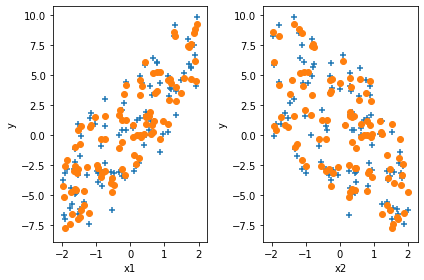

In [13]:
model = linear_model.LinearRegression()
model.fit(x1_x2, y)

### 계수, 절편, 결정 계수를 표시

print('계수', model.coef_)
print('절편', model.intercept_)
print('결정계수', model.score(x1_x2, y))


### 그래프 표시
y_ = model.predict(x1_x2)  # 구한 회귀식으로 예측

plt.subplot(1, 2, 1)
plt.scatter(x1, y, marker='+')
plt.scatter(x1, y_, marker='o')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(x2, y, marker='+')
plt.scatter(x2, y_, marker='o')
plt.xlabel('x2')
plt.ylabel('y')

plt.tight_layout()
plt.show()

### 과적합(과다한 학습, overfit) 의 특징

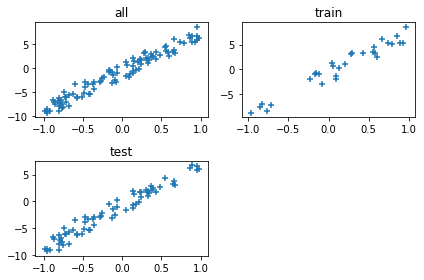

In [33]:
# Overfit 데이터 확인

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

x = np.random.rand(100, 1)      # 0~1까지 난수를 100개 만든다
x = x * 2 - 1                         # 값의 범위를 -2~2로 변경

y = 4 * x * 3 - 3 * x * 2 + 2 * x - 1

y += np.random.randn( 100, 1 )  # 표준 정규 분포(평균0, 표준 편차1) 난수를 더한다
# overfit의 문제를 확인하기위해 학습 데이터를 30만 지정
# 일반적으로 학습데이터가 2~3배정도 많음.
x_train = x[:30]
y_train = y[:30]

# 테스트 데이터 70개
x_test = x[30:]
y_test = y[30:]

plt.subplot( 2, 2, 1 )
plt.scatter( x, y, marker='+' )
plt.title( 'all' )

plt.subplot( 2, 2, 2 )
plt.scatter( x_train, y_train, marker='+' )
plt.title( 'train' )

plt.subplot( 2, 2, 3 )
plt.scatter( x_test, y_test, marker='+' )
plt.title( 'test' )

plt.tight_layout()
plt.show()



계수（학습 데이터） [[ 316.71682731 -122.16222713 -644.78838941  263.0930876   425.02112634
  -181.96414085  -93.05885762   40.72154147    9.74992362]]
절편（학습 데이터） [-1.14964451]
결정계수（학습 데이터） 0.9602602394296048
결정계수（테스트 데이터） 0.7679911194064518


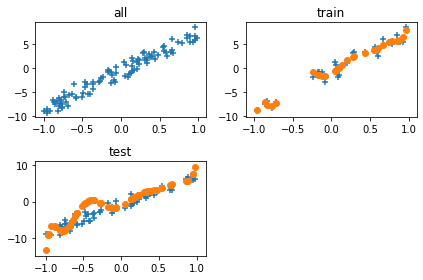

In [15]:
# 과적합 테스트용 학습
# 학습용 입력 데이터
X_TRAIN = np.c_[x_train**9, x_train**8, x_train**7, x_train**6, x_train**5,
                x_train**4, x_train**3, x_train**2, x_train]

model = linear_model.LinearRegression()
model.fit(X_TRAIN, y_train)

print('계수（학습 데이터）', model.coef_)
print('절편（학습 데이터）', model.intercept_)
print('결정계수（학습 데이터）', model.score(X_TRAIN, y_train))

X_TEST = np.c_[x_test**9, x_test**8, x_test**7, x_test**6, x_test**5,
               x_test**4, x_test**3, x_test**2, x_test]

print('결정계수（테스트 데이터）', model.score(X_TEST, y_test))

plt.subplot(2, 2, 1)
plt.scatter(x, y, marker='+')
plt.title('all')

plt.subplot(2, 2, 2)
plt.scatter(x_train, y_train, marker='+')
plt.scatter(x_train, model.predict(X_TRAIN), marker='o')
plt.title('train')

plt.subplot(2, 2, 3)
plt.scatter(x_test, y_test, marker='+')
plt.scatter(x_test, model.predict(X_TEST), marker='o')
plt.title('test')

plt.tight_layout()
plt.show()

# 결정계수（학습 데이터） 0.9602602394296048
# 결정계수（테스트 데이터） 0.7679911194064502
# 결정계수가 다른 이유는 학습 모델이 30개의 학습 데이터에 최적화되어있어
# 다른 데이터를 판단하는 능력이 떨어짐.

### 과적합 해결을위한 Ridge 회귀

In [16]:
np.random.seed(0)
x = np.random.rand(100, 1)  # 0~1까지 난수를 100개 만든다
x = x * 2 - 1               # 값의 범위를 -2~2로 변경

y = 4 * x**3 - 3 * x**2 + 2 * x - 1
y += np.random.randn(100, 1)  # 표준정규분포（평균 0,표준편차 1）의 난수를 더한다

# 학습 데이터 30개
x_train = x[:30]
y_train = y[:30]

# 테스트 데이터 70개
x_test = x[30:]
y_test = y[30:]

계수（학습 데이터） [[ 0.5859716  -0.10869592  0.76387664 -0.43896004  1.07351931 -1.01237622
   1.61671364 -1.83011989  2.41843551]]
절편（학습 데이터） [-0.68629831]
결정계수（학습 데이터） 0.8607059686551424
결정계수（테스트 데이터） 0.8862579918584202


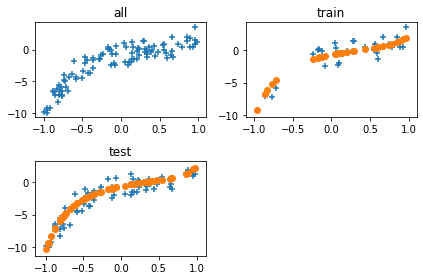

In [17]:
# 과적합 테스트용 학습
# 학습용 입력 데이터
X_TRAIN = np.c_[x_train**9, x_train**8, x_train**7, x_train**6, x_train**5,
                x_train**4, x_train**3, x_train**2, x_train]

model = linear_model.Ridge() ## Overfit 해결 Ridge모델
model.fit(X_TRAIN, y_train)

print('계수（학습 데이터）', model.coef_)
print('절편（학습 데이터）', model.intercept_)
print('결정계수（학습 데이터）', model.score(X_TRAIN, y_train))

X_TEST = np.c_[x_test**9, x_test**8, x_test**7, x_test**6, x_test**5,
               x_test**4, x_test**3, x_test**2, x_test]

print('결정계수（테스트 데이터）', model.score(X_TEST, y_test))

plt.subplot(2, 2, 1)
plt.scatter(x, y, marker='+')
plt.title('all')

plt.subplot(2, 2, 2)
plt.scatter(x_train, y_train, marker='+')
plt.scatter(x_train, model.predict(X_TRAIN), marker='o')
plt.title('train')

plt.subplot(2, 2, 3)
plt.scatter(x_test, y_test, marker='+')
plt.scatter(x_test, model.predict(X_TEST), marker='o')
plt.title('test')

plt.tight_layout()
plt.show()

# 결정계수（학습 데이터） 0.8607059686551424
# 결정계수（테스트 데이터） 0.8862579918584202
# 결정계수가 학습과 검증에 비슷하게 사용되어 최적의 학습이 된것으로 판단됨.

### 비선형회귀 모델

In [34]:
import math
print(math.sin(-10))
print(math.sin(-9))
print(math.sin(0))
print(math.sin(9))
print(math.sin(10))

0.5440211108893698
-0.4121184852417566
0.0
0.4121184852417566
-0.5440211108893698


In [35]:
### 분산이 있는 사인파 데이터를 작성
np.random.seed(0)
x = np.random.rand(1000, 1)  # 0~1까지 난수를 1000개 만든다
x = x * 20 - 10              # 값의 범위를 -10~10으로 변경

y = np.array([math.sin(v) for v in x])  # 사인파 커브로 변형
y += np.random.randn(1000)  # 표준 정규 분포(평균0, 표준 편차1) 난수를 더한다

계수 [0.02174475]
절편 0.024979414128832488
결정계수 0.011558707408394486


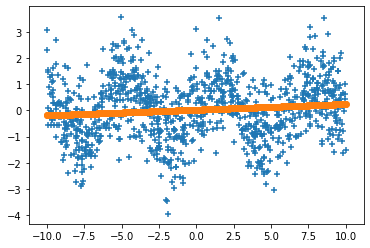

In [36]:
model = linear_model.LinearRegression()
model.fit(x, y)

print('계수', model.coef_)
print('절편', model.intercept_)
r2 = model.score(x, y)
print('결정계수', r2)

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()

### SVM

In [21]:
np.random.seed(0)
x = np.random.rand(1000, 1)  # 0~1까지 난수를 1000개 만든다
x = x * 20 - 10              # 값의 범위를 -10~10으로 변경

y = np.array([math.sin(v) for v in x])  # 사인파 커브로 변형
y += np.random.randn(1000)  # 표준 정규 분포(평균0, 표준 편차1) 난수를 더한다

결정계수 0.3435772541187131


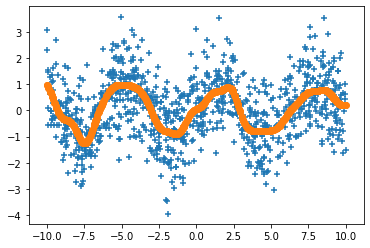

In [22]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn import svm

model = svm.SVR()  ## SVN 모델, 선형이 아닐때
model.fit(x, y)

r2 = model.score(x, y)
print('결정계수', r2)

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()

### Random mforest를 이용한 비선형회귀모델 사용

In [23]:
np.random.seed(0)
x = np.random.rand(1000, 1)  # 0~1까지 난수를 1000개 만든다
x = x * 20 - 10              # 값의 범위를 -10~10으로 변경

y = np.array([math.sin(v) for v in x])  # 사인파 커브로 변형
y += np.random.randn(1000)  # 표준 정규 분포(평균0, 표준 편차1) 난수를 더한다

결정계수 0.820343781201656
데이터: [[ 0.97627008]
 [ 4.30378733]
 [ 2.05526752]
 [ 0.89766366]
 [-1.52690401]]
실제값: [ 0.72671667 -0.89839794  2.73451261  0.56770582 -1.49805353]
예측값: [ 0.73377915 -0.86808255  2.26039899  0.69445093 -1.18269566]


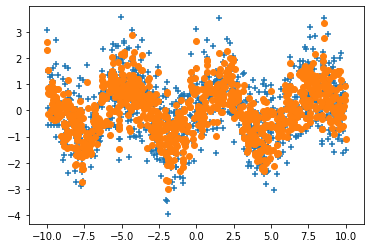

In [24]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn import ensemble

model = ensemble.RandomForestRegressor()  ## Random Forest 모델(비선형)
model.fit(x, y)

r2 = model.score(x, y)
print('결정계수', r2)

print('데이터:', x[0:5])
print('실제값:', y[0:5])
print('예측값:', model.predict(x[0:5]))
plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()

### K-nearest neighbor(KNN, K-최근접)

In [25]:
np.random.seed(0)
x = np.random.rand(1000, 1)  # 0~1까지 난수를 1000개 만든다
x = x * 20 - 10              # 값의 범위를 -10~10으로 변경

y = np.array([math.sin(v) for v in x])  # 사인파 커브로 변형
y += np.random.randn(1000)  # 표준 정규 분포(평균0, 표준 편차1) 난수를 더한다

결정계수 0.4760594705439133
데이터: [[ 0.97627008]
 [ 4.30378733]
 [ 2.05526752]
 [ 0.89766366]
 [-1.52690401]]
실제값: [ 0.72671667 -0.89839794  2.73451261  0.56770582 -1.49805353]
예측값: [ 0.49115074 -1.14138783  1.50733093  0.54421917 -1.50362332]


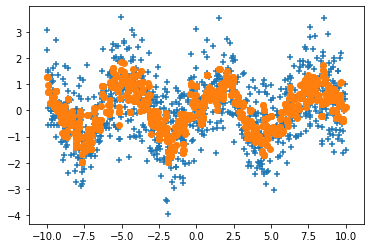

In [26]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn import neighbors

model = neighbors.KNeighborsRegressor() # KNN 모델
model.fit(x, y)

r2 = model.score(x, y)
print('결정계수', r2)

print('데이터:', x[0:5])
print('실제값:', y[0:5])
print('예측값:', model.predict(x[0:5]))
plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()